In [1]:
%matplotlib inline
#
from lrgsglib.shared import *
from lrgsglib.config.const import *
from lrgsglib.config.plotlib import inset_axes, restr_twilight, get_opposite_color, credcblu, plot_honeycomb_grid
from lrgsglib.config.funcs import read_files_to_2d_array
from lrgsglib.core import move_to_rootf, Lattice2D
from matplotlib.ticker import ScalarFormatter
from scipy.signal import find_peaks
#
move_to_rootf()
plt.style.use("ipynb/nb_plotsheet.mplstyle")
#
suppinfPath = "data/plot/paper/suppinf/"
datasubPathStr = ["data_pablo_tri-hex", "data_pablo_2-3-4-D"]
figsubpathstr = ['phtra']
paths = {str: f"{suppinfPath}{str}/" for str in figsubpathstr}
for path in paths.values(): os.makedirs(path, exist_ok=True)
#
axvline_kwarg = dict(ls=':', color='k')
xlabelinset_kwargs = dict(labelpad=0, fontsize=18)
ylabelinset_kwargs = dict(rotation=90, labelpad=10, va="center",fontsize=18)
axins_tickparams_kwargs = dict(axis='both', which='major', size=7, width=1.25, labelsize=16)
axlegend_kwargs = dict(ncol=1, loc='lower left', fontsize=18)
kwargs_lines = dict(lw=5, marker='')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


In [5]:
def process_plot(fig, ax, sides, geo, column, pathfname, legend_pos=None, 
                 ylabel='', text_content='', text_pos=None,
                 transform=lambda x, L: x, transvline=False, compute_double_peaks=False):
    colors = restr_twilight(np.linspace(0., 1., len(sides)))
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)
    for cc, side in enumerate(sides):
        if geo in ['tri', 'hex', 'sqr']:
            l = Lattice2D(side, geo)
            N = l.N
        elif geo == '4D':
            N = side**4
        fname = f"{pathfname}{side}"
        data = np.loadtxt(fname, delimiter=',')
        y_data = gaussian_filter(data[:, column], sigma=1)
        p = data[:, 9]
        if transform:
            y_data = transform(y_data, side)
        line, = ax.plot(p, y_data, label=fr'${N}$', zorder=1/(cc+1), 
                **kwargs_lines)
        # Compute and plot double peaks if requested with denoising
        if compute_double_peaks:
            # Apply a denoising filter to reduce noise before finding peaks
            smoothed_data = gaussian_filter(data[:, column], sigma=1.5)
            peaks, _ = find_peaks(smoothed_data, prominence=0.0001)
            if len(peaks) >= 2:
                print(side, p[peaks[0]], p[peaks[1]])
                # ax.axvline(p[peaks[0]], ls='--', c=line.get_color())
                # ax.axvline(p[peaks[1]], ls='--', c=get_opposite_color(line.get_color()))
    ax.set_xlabel(r'$p$')
    ax.set_ylabel(ylabel)
    if text_pos:
        ax.text(*text_pos, text_content, transform=ax.transAxes, fontsize=40, 
                fontweight='bold', color='black')
    if transvline:
        peaks, _ = find_peaks(gaussian_filter(data[:, column], sigma=1.5))
        ax.axvline(p[peaks[0]], ls='--', c='k')
    ax.legend(fontsize=28, loc=legend_pos if legend_pos else 'upper right')
    fig.tight_layout()

## Phase Transitions

### Hex: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [10]:
sides = [16, 32, 64, 128]
geo = 'hex'
pathfname = os.path.join(suppinfPath, datasubPathStr[0], "OP_Hex_L")

In [11]:
fig_1, ax_1 = plt.subplots(figsize=(11, 7))
fig_2, ax_2 = plt.subplots(figsize=(11, 7))

process_plot(fig_1, ax_1, sides, geo, 0, pathfname, 
             ylabel=r'$P_{\infty}$')#, text_pos=(0.03, 0.06), text_content=r'\textbf{(a)}')
process_plot(fig_2, ax_2, sides, geo, 1, pathfname, 
             transform=lambda x, L: x*L, ylabel=r'$\chi$', 
             legend_pos=(0.6, 0.35), transvline=True)# text_pos=(0.88, 0.88), text_content=r'\textbf{(b)}')

# Save figures
fig_1.savefig(f"{paths['phtra']}suppli_S_{geo}.pdf", 
              bbox_inches='tight', transparent=True)
fig_2.savefig(f"{paths['phtra']}suppli_fS_{geo}.pdf", 
              bbox_inches='tight', transparent=True)

plt.close('all')

In [ ]:
data = np.array([
    [32, 0.0913758389261745, 0.2608053691275168],
    [64, 0.06812080536912751, 0.20432885906040268],
    [128, 0.06479865771812081, 0.16446308724832215],
    [256, 0.05483221476510067, 0.11463087248322149]
])

# Extract columns
x = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]

# Plotting in log scale for x-axis
plt.figure(figsize=(8, 6))
plt.plot(x**2, y1, label='Column 1 vs Column 2', marker='o')
plt.plot(x**2, y2, label='Column 1 vs Column 3', marker='o')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Column 1 (log scale)')
plt.ylabel('Values')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Tri: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [ ]:
sides = [16, 32, 64, 96]
geo = 'tri'
pathfname = os.path.join(suppinfPath, datasubPathStr[0], "OP_Tri_L")

In [ ]:
fig_1, ax_1 = plt.subplots(figsize=(11, 7))
fig_2, ax_2 = plt.subplots(figsize=(11, 7))

process_plot(fig_1, ax_1, sides, geo, 0, pathfname, 
             ylabel=r'$P_{\infty}$')#, text_pos=(0.03, 0.06), text_content=r'\textbf{(a)}')
process_plot(fig_2, ax_2, sides, geo, 1, pathfname, 
             transform=lambda x, L: x*L, ylabel=r'$\chi$', 
             legend_pos='upper right', transvline=True)# text_pos=(0.88, 0.88), text_content=r'\textbf{(b)}')

# Save figures
fig_1.savefig(f"{paths['phtra']}suppli_S_{geo}.pdf", 
              bbox_inches='tight', transparent=True)
fig_2.savefig(f"{paths['phtra']}suppli_fS_{geo}.pdf", 
              bbox_inches='tight', transparent=True)

plt.close('all')

### 4D: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [ ]:
sides = [7, 8, 9, 10]
geo = '4D'
pathfname = os.path.join(suppinfPath, datasubPathStr[1], "OP_Squared4D_L")

In [ ]:
fig_1, ax_1 = plt.subplots(figsize=(11, 7))
fig_2, ax_2 = plt.subplots(figsize=(11, 7))

process_plot(fig_1, ax_1, sides, geo, 0, pathfname, legend_pos='lower left',
             ylabel=r'$P_{\infty}$')#, text_pos=(0.03, 0.06), text_content=r'\textbf{(a)}')
process_plot(fig_2, ax_2, sides, geo, 1, pathfname, legend_pos='upper left',
             transform=lambda x, L: x*L*L, ylabel=r'$\chi$', 
             transvline=True)# text_pos=(0.88, 0.88), text_content=r'\textbf{(b)}')

# Save figures
fig_1.savefig(f"{paths['phtra']}suppli_S_{geo}.pdf", 
              bbox_inches='tight', transparent=True)
fig_2.savefig(f"{paths['phtra']}suppli_fS_{geo}.pdf", 
              bbox_inches='tight', transparent=True)

plt.close('all')

### Tri ZERR: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [7]:
sides = [16, 32, 64, 96, 128]
geo = 'tri'
pathfname = os.path.join(suppinfPath, datasubPathStr[0], "OP_Zerr_Tri_L")

In [8]:
fig_1, ax_1 = plt.subplots(figsize=(11, 7))
fig_2, ax_2 = plt.subplots(figsize=(11, 7))

process_plot(fig_1, ax_1, sides, geo, 0, pathfname, 
             ylabel=r'$P_{\infty}$')#, text_pos=(0.03, 0.06), text_content=r'\textbf{(a)}')
process_plot(fig_2, ax_2, sides, geo, 1, pathfname, 
             transform=lambda x, L: x*L, ylabel=r'$\chi$', 
             legend_pos='upper right', transvline=True)# text_pos=(0.88, 0.88), text_content=r'\textbf{(b)}')

# Save figures
fig_1.savefig(f"{paths['phtra']}suppli_S_{geo}Zerr.pdf", 
              bbox_inches='tight', transparent=True)
fig_2.savefig(f"{paths['phtra']}suppli_fS_{geo}Zerr.pdf", 
              bbox_inches='tight', transparent=True)

plt.close('all')

### Hex XERR: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [239]:
sides = [16, 32, 64, 128]
geo = 'hex'
pathfname = os.path.join(suppinfPath, datasubPathStr[0], "OP_Xerr_Hex_L")

In [240]:
fig_1, ax_1 = plt.subplots(figsize=(11, 7))
fig_2, ax_2 = plt.subplots(figsize=(11, 7))

process_plot(fig_1, ax_1, sides, geo, 0, pathfname, 
             ylabel=r'$P_{\infty}$')#, text_pos=(0.03, 0.06), text_content=r'\textbf{(a)}')
process_plot(fig_2, ax_2, sides, geo, 1, pathfname, 
             transform=lambda x, L: x*L, ylabel=r'$\chi$', 
             legend_pos=(0.6, 0.35), transvline=False)# text_pos=(0.88, 0.88), text_content=r'\textbf{(b)}')

# Save figures
fig_1.savefig(f"{paths['phtra']}suppli_S_{geo}Xerr.pdf", 
              bbox_inches='tight', transparent=True)
fig_2.savefig(f"{paths['phtra']}suppli_fS_{geo}Xerr.pdf", 
              bbox_inches='tight', transparent=True)

plt.close('all')

### Sqr ZERR: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [22]:
sides = [16, 32, 64, 96, 128]
geo = 'sqr'
pathfname = os.path.join(suppinfPath, datasubPathStr[0], "OP_Zerr_Squared_L")

In [25]:
fig_1, ax_1 = plt.subplots(figsize=(11, 7))
fig_2, ax_2 = plt.subplots(figsize=(11, 7))

process_plot(fig_1, ax_1, sides, geo, 0, pathfname, 
             ylabel=r'$P_{\infty}$')#, text_pos=(0.03, 0.06), text_content=r'\textbf{(a)}')
process_plot(fig_2, ax_2, sides, geo, 1, pathfname, 
             transform=lambda x, L: x*L, ylabel=r'$\chi$', 
             legend_pos=(0.6, 0.35), transvline=False)# text_pos=(0.88, 0.88), text_content=r'\textbf{(b)}')

# Save figures
fig_1.savefig(f"{paths['phtra']}suppli_S_{geo}Zerr.pdf", 
              bbox_inches='tight', transparent=True)
fig_2.savefig(f"{paths['phtra']}suppli_fS_{geo}Zerr.pdf", 
              bbox_inches='tight', transparent=True)

plt.close('all')

### Sqr XERR: Size of the giant Cluster $P_{\infty}$ and Fluctuations $\chi$

In [2]:
sides = [16, 32, 64, 96]
geo = 'sqr'
pathfname = os.path.join(suppinfPath, datasubPathStr[0], "OP_Xerr_Squared_L")

NameError: name 'process_plot' is not defined

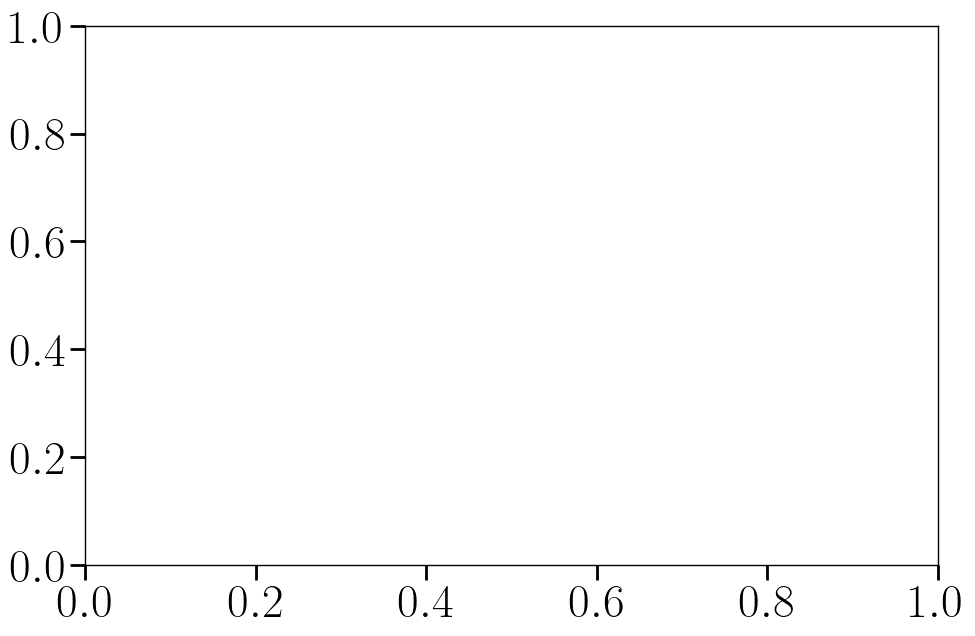

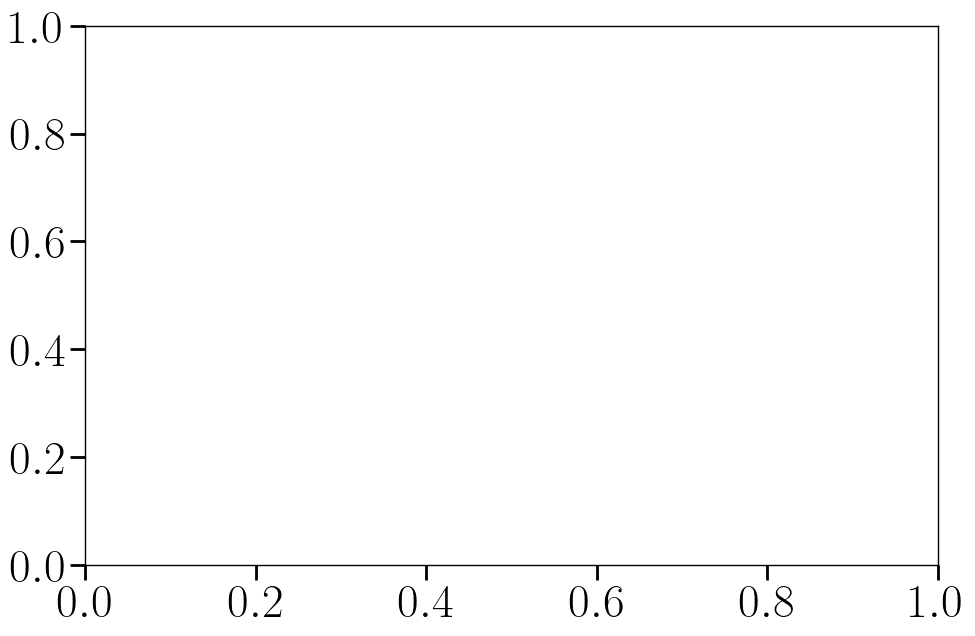

In [3]:
fig_1, ax_1 = plt.subplots(figsize=(11, 7))
fig_2, ax_2 = plt.subplots(figsize=(11, 7))

process_plot(fig_1, ax_1, sides, geo, 0, pathfname, 
             ylabel=r'$P_{\infty}$')#, text_pos=(0.03, 0.06), text_content=r'\textbf{(a)}')
process_plot(fig_2, ax_2, sides, geo, 1, pathfname, 
             transform=lambda x, L: x*L, ylabel=r'$\chi$', 
             legend_pos=(0.6, 0.35), transvline=False)# text_pos=(0.88, 0.88), text_content=r'\textbf{(b)}')

# Save figures
fig_1.savefig(f"{paths['phtra']}suppli_S_{geo}Xerr.pdf", 
              bbox_inches='tight', transparent=True)
fig_2.savefig(f"{paths['phtra']}suppli_fS_{geo}Xerr.pdf", 
              bbox_inches='tight', transparent=True)

plt.close('all')

### X error structure

- the multiscale structure gets synchronized with $p$, so when the disorder induces paths of frustration of length comparable to the mode wavelength it fragments that order,
- this process diverges as the transition (second peak) is approached
- this is seen not in the 0 eigenstate but in the second ones which are the excitation modes which are metastable state
- the first transition then marks the ending of the free diffusion regime for higher modes, where localization takes place, interference with the frustration paths, but the lowest eigestate is still the most stable up to surface effects (they go to zero in the volume) 
- the second one is marking the transition to the really disordered phase where competition evolve to antiferromagnetic domains and ferromagnetic ones, this is also why you should not see in the P_inf the first peak, then why it isso in the squared? hex and square should be the same
- you need more $p$ to destroy the microscale! (sinchronization of disorder with scales) 

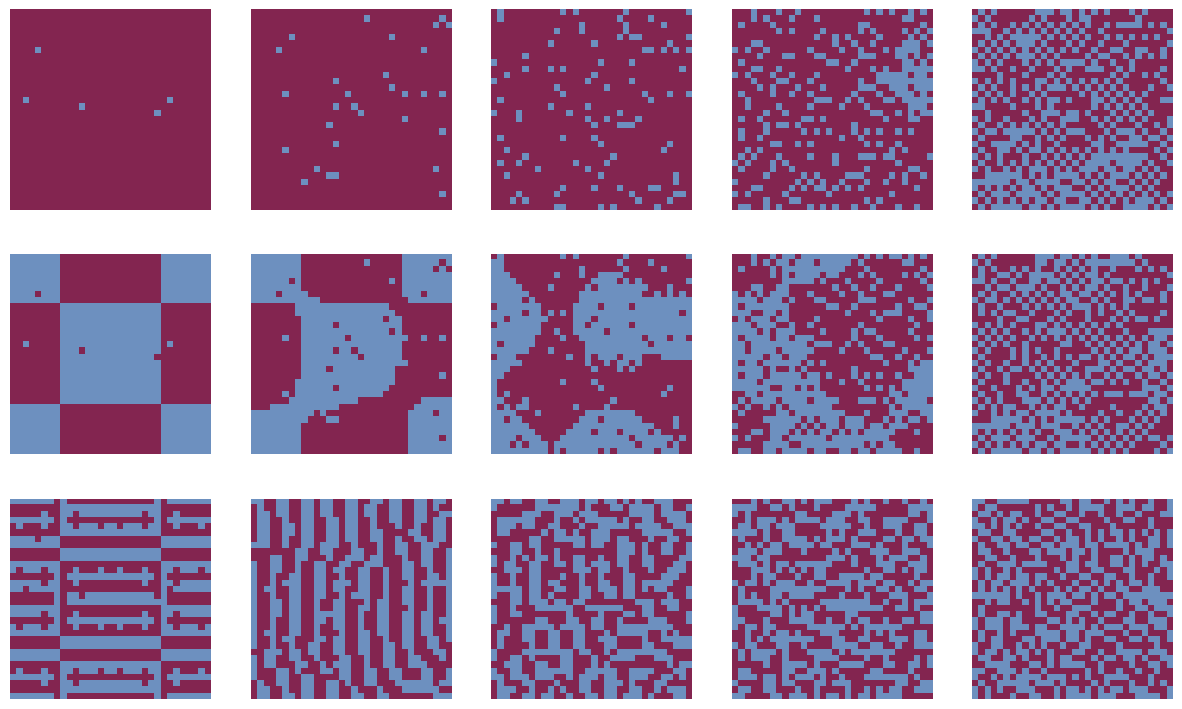

In [8]:
fig, ax = plt.subplots(figsize=(3*5, 3*3), ncols=5, nrows=3)
for i,p in enumerate([0.005, 0.03, 0.1, 0.25, 0.5]):
    l = Lattice2D(32, geo='sqr', pbc=False, pflip=p, init_nw_dict=True)
    l.flip_sel_edges(l.nwDict['randXERR']['G'])
    l.compute_k_eigvV()
    eigV = l.eigV[0]
    negative_count = np.sum(eigV < 0)
    positive_count = np.sum(eigV > 0)
    # Determine majority sign
    minority_sign = -1 if negative_count > positive_count else 1
    # Find positions of elements with majority sign
    if minority_sign == -1:
        min_pos = np.where(eigV < 0)[0]  # Get positions of negative values
    else:
        min_pos = np.where(eigV > 0)[0]  # Get positions of positive values
    subG = l.G.subgraph(min_pos)
    # Find the connected components of the subgraph
    clust = np.array([component for component in nx.connected_components(subG)])
    srtclust=sorted(clust, key=len)
    l.load_eigV_on_graph(binarize=True)
    # cd = l.get_cluster_distribution()
    ax[0][i].imshow(l.get_eigV_bin_check(which=0).reshape(*l.syshape), interpolation='none', cmap=credcblu)

    ax[1][i].imshow(l.get_eigV_bin_check(which=8).reshape(*l.syshape), interpolation='none', cmap=credcblu)
    ax[2][i].imshow(l.get_eigV_bin_check(which=256).reshape(*l.syshape), interpolation='none', cmap=credcblu)
for axx in ax.flatten():
    axx.axis('off')

In [ ]:

# Assuming l.eigV[0] is already assigned to a variable named 'data'
data = l.eigV[0]

# Remove zero values to avoid log problems
data = data[data != 0]

# Separate positive and negative values
positive_values = data[data > 0]
negative_values = data[data < 0]

# Define the number of bins
num_bins = 100

# Set the range for positive and negative values based on the minimum value in the data
log_min = np.log10(np.abs(data).min())
log_max = 0

bins_positive = np.logspace(log_min, log_max, num_bins)
bins_negative = -np.logspace(log_min, log_max, num_bins)[::-1]

# Create a histogram for both positive and negative values
hist_positive, _ = np.histogram(positive_values, bins=bins_positive)
hist_negative, _ = np.histogram(negative_values, bins=bins_negative)

# Combine the histogram data
bins_combined = np.concatenate((bins_negative, bins_positive))

# Ensure hist_combined has the correct length
hist_combined = np.concatenate((hist_negative, hist_positive))

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(-bins_negative[1:], hist_negative)
plt.yscale('log')
plt.xscale('log')

## Phase transition ZERR/XERR

In [17]:
errtype = 'Zerr'

### Squared

In [18]:
sides = [16, 32, 64, 96]
geo = 'squared'
#
colors = restr_twilight(np.linspace(0.0, 1, len(sides)))
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

In [ ]:
fig, ax = plt.subplots(figsize=(22, 8), ncols=2)

for cc, side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Squared_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        S = gaussian_filter(data[:, 0], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[0].plot(p, S, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
# ax[0].axhline(0.5, ls='--', c='k')
#
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$P_{\infty}$')
#
ax[0].text(0.03, 0.06, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[0].legend(fontsize=28)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc,side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Squared_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        fS = gaussian_filter(data[:, 1], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[1].plot(p, fS*L, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
ax[1].axvline(0.10, ls='--', c='k')
#
# ax[1].set_yticks([])
formatter = ScalarFormatter(useMathText=True)  # Enable the use of math text in scientific notation
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((-1,1))  # Set limits for switching to scientific notation
ax[1].yaxis.set_major_formatter(formatter)

ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$\chi$')
#
ax[1].text(0.88, 0.88, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=40,
                 fontweight='bold', color='black', zorder=100000)
ax[1].legend(fontsize=26, bbox_to_anchor=(.6, .35))
fig.tight_layout()
fig.subplots_adjust(wspace=.5)  # 'wspace' controls the width of the space between subplots
#
# fig.savefig(f"{paths['phtra']}suppli_both_{errtype}_{geo}.pdf", bbox_inches='tight',
#             transparent=True)
# plt.close('all')

### Triangular

In [ ]:
sides = [16, 32, 64, 96]
geo = 'tri'
#
colors = restr_twilight(np.linspace(0.0, 1, len(sides)))
# Set these colors as the default color cycle
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

In [ ]:
fig, ax = plt.subplots(figsize=(22, 8), ncols=2)

for cc, side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Tri_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        S = gaussian_filter(data[:, 0], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[0].plot(p, S, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
# ax[0].axhline(0.5, ls='--', c='k')
#
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$P_{\infty}$')
#
ax[0].text(0.03, 0.06, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=40,
                 fontweight='bold', color='black')
ax[0].legend(fontsize=28)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

for cc,side in enumerate(sides):
    try:
        l = Lattice2D(side, geo, init_nw_dict=False, with_positions=False)
        fname = f"data/plot/paper/suppinf/data_pablo_tri-hex/OP_{errtype}_Tri_L{side}"
        data = np.loadtxt(fname, delimiter=',')
        p = data[:, 9]
        p_c = data[np.argmax(data[:, 1]), 9]
        fS = gaussian_filter(data[:, 1], sigma=1)
        L = side
        # plt.plot(p, S, label=f'L={side}', lw=2)
        ax[1].plot(p, fS*L, label=fr'$N={l.N}$', zorder=1/(cc+1), **kwargs_lines)
    except FileNotFoundError:
        print(f"File not found for L={side}")
#
ax[1].axvline(0.14, ls='--', c='k')
#
# ax[1].set_yticks([])
formatter = ScalarFormatter(useMathText=True)  # Enable the use of math text in scientific notation
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((-1,1))  # Set limits for switching to scientific notation
ax[1].yaxis.set_major_formatter(formatter)

ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$\chi$')
#
ax[1].text(0.88, 0.88, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=40,
                 fontweight='bold', color='black', zorder=100000)
ax[1].legend(fontsize=26, bbox_to_anchor=(.6, .45))
fig.tight_layout()
fig.subplots_adjust(wspace=.5)  # 'wspace' controls the width of the space between subplots
#
fig.savefig(f"{paths['phtra']}suppli_both_{errtype}_{geo}.pdf", bbox_inches='tight',
            transparent=True)
# plt.close('all')